# Implementing the Perceptron Algorithm

## Introduction:  

In this blog post, I implement the Perceptron Algorithm to classify linearly separable data. This algorithm is a supervised machine learning model which classifies input data into two distinct groups. In this notebook, I will perform multiple experiments which show the model's strengths, weaknesses, and overall performance.

## Implementation

<a href="https://github.com/johnny-kantaros/johnny-kantaros.github.io/blob/main/posts/Blog1-Perceptron/perceptron.py">See Source Code</a>  

To implement my fit() algorithm, I followed these steps (much of which came from class lectures and notes):

1. Modify input target vector (y) to have values [-1, 1] instead of [0, 1]
2. Initialize weight vector (w) randomly with length p+1, where p is the number of features of X
3. While loss != 0 and steps < max_steps:
    1. Pick a random observation from input array
    2. Make a prediction $\hat{y} = <X_{i}, w>$
    3. If $y_{i}\neq\hat{y_{i}}$:
        1. Update w: $ w_{new} = w_{old} + y_{i}*x_{i}$ 
        2. Calculate loss
        3. Update history
    4. Increment steps

If the data is linearly separable, this algorithm should quickly converge and can be used to classify data. However, as you will see, if the data is not linearly separable, the algorithm is unable to converge.

## Experiments

In the following experiments, I will fit my perceptron algorithm and test it on a variety of cases. 

### Experiment 1: Linearly separable data

#### 1. Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#### 2. Make linearly separable data

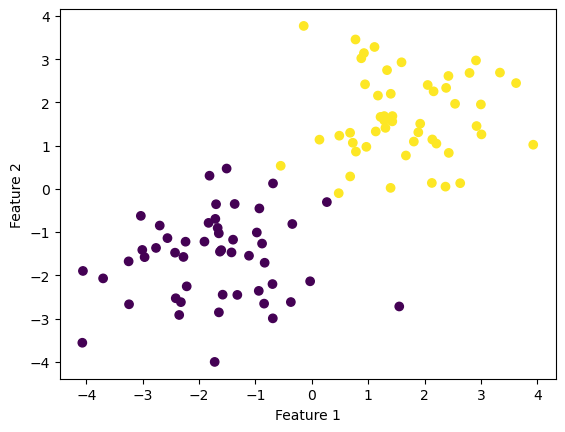

In [10]:
from sklearn.datasets import make_blobs

np.random.seed(12345)

n = 100
p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

#### 3. Import our model and fit it on our data

In [11]:
from perceptron import Perceptron

p = Perceptron()
p.fit(X, y, max_steps = 1000)

#### 4. Check our resulting weights vector

In [12]:
p.w

array([2.10557404, 3.1165449 , 0.25079936])

#### 5. Inspect accuracy (should be 100%)

In [17]:
p.score(X, y)

1.0

#### 6. Inspect our loss history

In [13]:
p.history

[0.98, 0.98, 0.95, 0.97, 0.98, 0.98, 0.98, 0.98, 0.99, 1.0]

#### 7. Plot our loss history

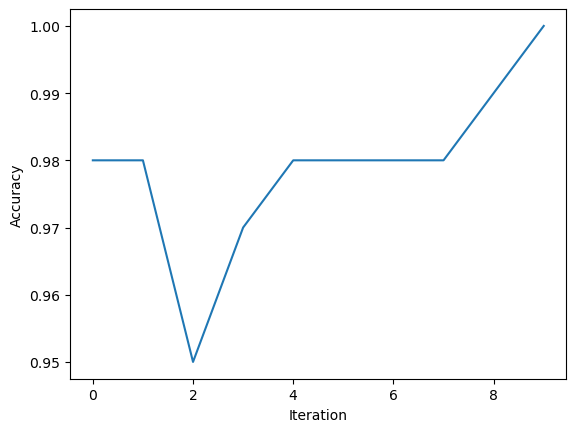

In [14]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

#### 8. Inspect our separating line

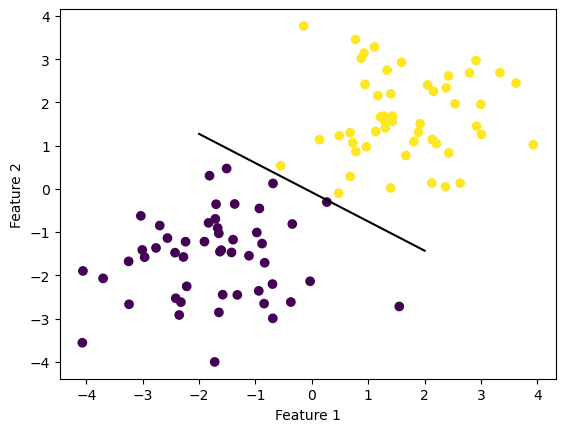

In [15]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

#### Results:  

As we see from our experiment, when presented linearly separable data, the perceptron algorithm is very efficient in converging on a optimal weight vector, w. In our example above, our weight vector was updated 10 times before reaching 100% accuracy!

### Experiment 2: Data is not Linearly Seperable

#### 1. Make data

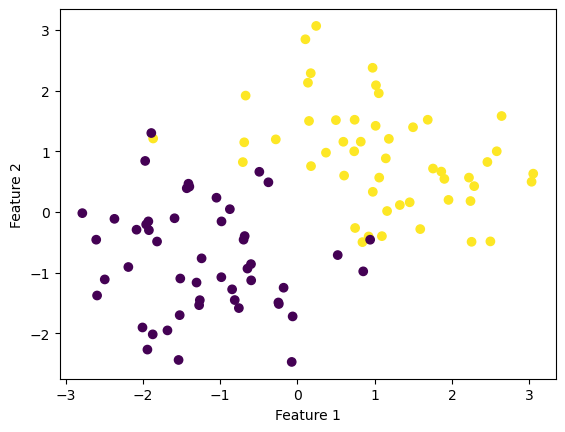

In [20]:
n = 100
p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

#### 2. Fit our model

In [22]:
p = Perceptron()
p.fit(X, y, max_steps = 1000)

#### 3. Inspect our weight vector

In [23]:
p.w

array([1.93799173, 5.1135707 , 0.12419737])

#### 4. Inspect our accuracy

In [26]:
p.score(X, y)

0.94

#### 5. Plot our loss history

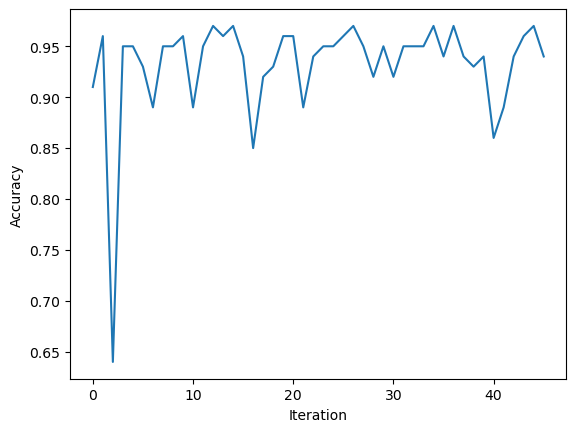

In [27]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

#### 6. Draw our resulting line

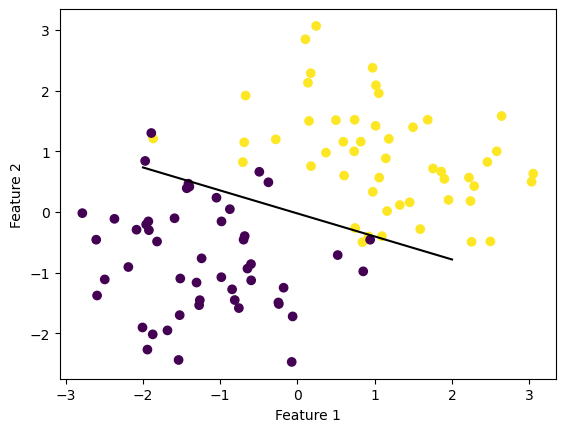

In [28]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

#### Results:  
In this experiment, we tried to fit our perceptron model on non-linearly separable data. As you can see, the algorithm was unable to converge and ended with a ~94% accuracy. Although this is a good accuracy given the data, the algorithm had to perform all iterations, as the accuracy never hit 100%. In larger scale ML applications, this could result in longer run times and it would be best to pick another classifier. 

### Experiment 3: Perceptron in higher dimensions.

#### 1. Create data with 6 features

In [76]:
n = 100
p_features = 6

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

#### 2. Fit our model

In [77]:
p = Perceptron()
p.fit(X, y, max_steps = 100)

#### 3. Check our weight vector

In [78]:
p.w

array([2.82132036, 2.46440965, 1.25546743])

#### 4. Check accuracy

In [80]:
p.score(X, y)

1.0

Our algorithm achieved perfect classification in higher dimensions!
#### 5. Plot loss history

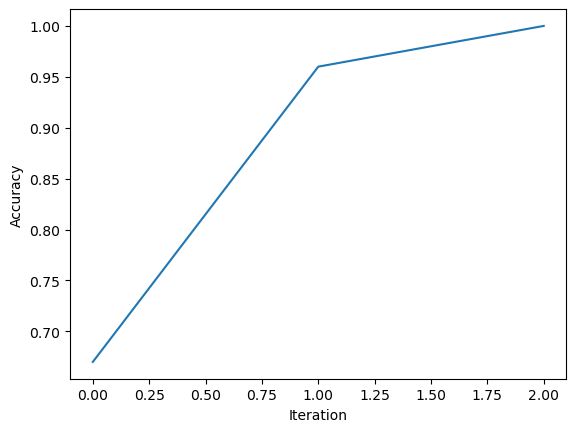

In [81]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

#### Results:  

As you can see, our perceptron model works in higher dimensions! Additionally, the algorithm does not necessarily take longer to converge when adding dimensions, which is very powerful.

### Runtime

The run time of a single update in the fit() algorithm depends on the size of the input vector. More specifically, it depends on the number of features, $p$.

In each step, we need to compute the weighted sum of the inputs, which will take $O(p)$ time.

Therefore, a single update will take $O(p)$ time.